In [ ]:
from pprint import pprint

# Tutorial: Using the SPB-SFX Module
This tutorial demonstrates the use of the [SPB-SFX instance](https://github.com/twguest/FELpy/blob/master/felpy/model/beamlines/exfel_spb/exfel_spb.py) of the [felpy.model.instrument](https://github.com/twguest/FELpy/blob/master/felpy/model/core/instrument.py) class in the design and analysis of a virtual diagnostic experiment.

In this tutorial we will demonstrate:
1. Loading an instance of the SPB-SFX module
2. Modification of the beamline
3. Propagation of a wpg.wavefront in .h5 file format (i.e. from Genesis or otherwise)
4. Simple analysis of the wavefront using native properties of the [FELpy wavefront](https://github.com/twguest/FELpy/blob/master/felpy/model/core/wavefront.py) class

## Loading the SPB-SFX Module
The [SPB-SFX methods](https://github.com/twguest/FELpy/blob/master/felpy/model/beamlines/exfel_spb/methods.py) module contains functionality to load the SPB-SFX model.

Given that we may wish to load/save different configurations of the instrumennt, the setup_spb module initilisases due to a parameter.json file.

An example parameters file is located in the [/data/](https://github.com/twguest/FELpy/blob/master/felpy/data/params/exfel_spb.json) folder.

The setup_spb function allows an easy way to setup the beamline based on numerous typical parameters relativing to mirrors, etc.:

In [ ]:
from felpy.model.beamlines.exfel_spb.methods import setup_spb

spb = setup_spb(parameter_file = "/gpfs/exfel/data/user/guestt/FELpy/felpy/data/params/spb-sfx_nkb_GM_4.98.json",
                theta_KB = 5e-03, ### KB mirror angle                
                theta_HOM = 5.0e-03, ### tunnel mirror angle
                crop = ['HOM1', 'NVE']) ### crop b/w two elements

## pprint(spb.params)


Initialising Single Particle Beamline


## Beamline Modification

In [3]:
from felpy.model.tools import propagation_parameters

spb.elements

spb.edit_propagation_parameters("d1", propagation_parameters(1,1,1,1, mode = 'quadratic'))

bl = spb.bl


List of Elements: ['d1', 'HOM1', 'd2', 'HOM2', 'd3', 'NKB_PSlit', 'd4', 'NHE_error', 'NHE', 'd5', 'NVE_error', 'NVE']


## Propagating a WPG Wavefront

### Loading a Wavefront

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


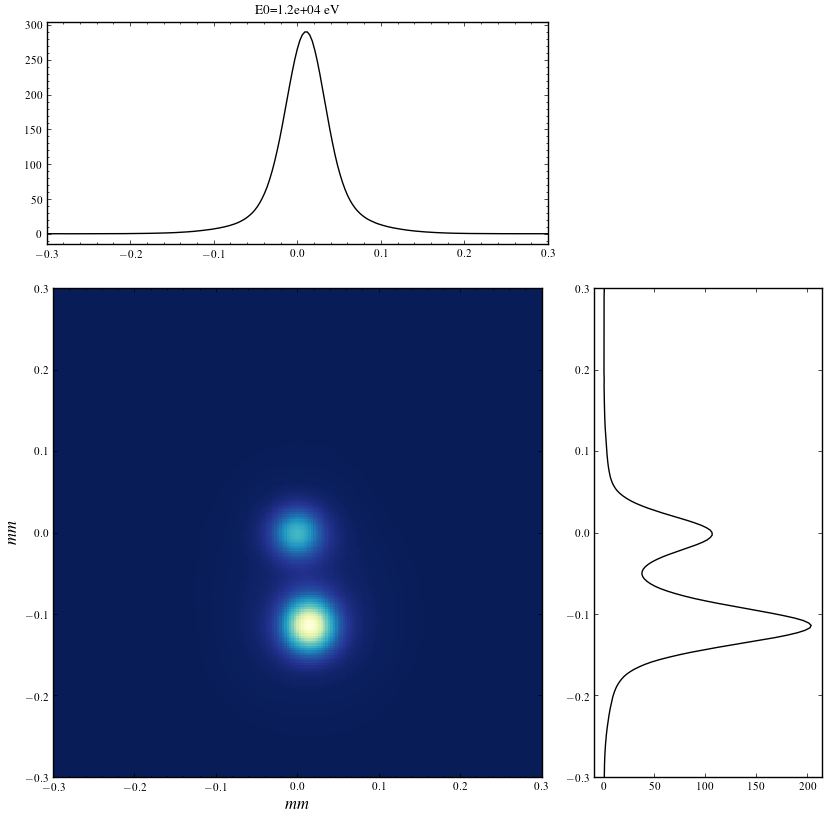

Radiation:
	Mesh:
		hvx = 1
		hvy = 0
		hvz = 0
		nSlices = 11576
		nvx = 0
		nvy = 0
		nvz = 1
		nx = 201
		ny = 201
		qxMax = None
		qxMin = None
		qyMax = None
		qyMin = None
		sliceMax = 12413.40143126935
		sliceMin = 11661.135215643484
		xMax = 0.0003
		xMin = -0.0003
		yMax = 0.0003
		yMin = -0.0003
		zCoord = 0.0
		
	Rx = 0.0
	Ry = 0.0
	dRx = 0.0
	dRy = 0.0
	nSlices = 11576
	nval = 2
	nx = 201
	ny = 201
	photonEnergy = 12037.300818757309
	wDomain = frequency
	wEFieldUnit = sqrt(J/eV/mm^2)
	wFloatType = float
	wSpace = R-space
	xCentre = 0.0
	yCentre = 0.0
	
	arrEhor = array of shape (201, 201, 11576, 2) // the 2-nd dimension is (re,im)
	arrEver = array of shape (201, 201, 11576, 2) // the 2-nd dimension is (re,im)



In [8]:
from felpy.model.wavefront import Wavefront
from wpg.wpg_uti_wf import plot_intensity_map
h5_file_location = "/gpfs/exfel/data/group/wp72/SPP/source_to_wavefront/scripts/14_1_Sase1.WPG.h5"  ## an example file

wfr = Wavefront()
wfr.load_hdf5(h5_file_location)

wfr.set_electric_field_representation('frequency')
plot_intensity_map(wfr)
print(wfr)

### Propagating a Wavefront

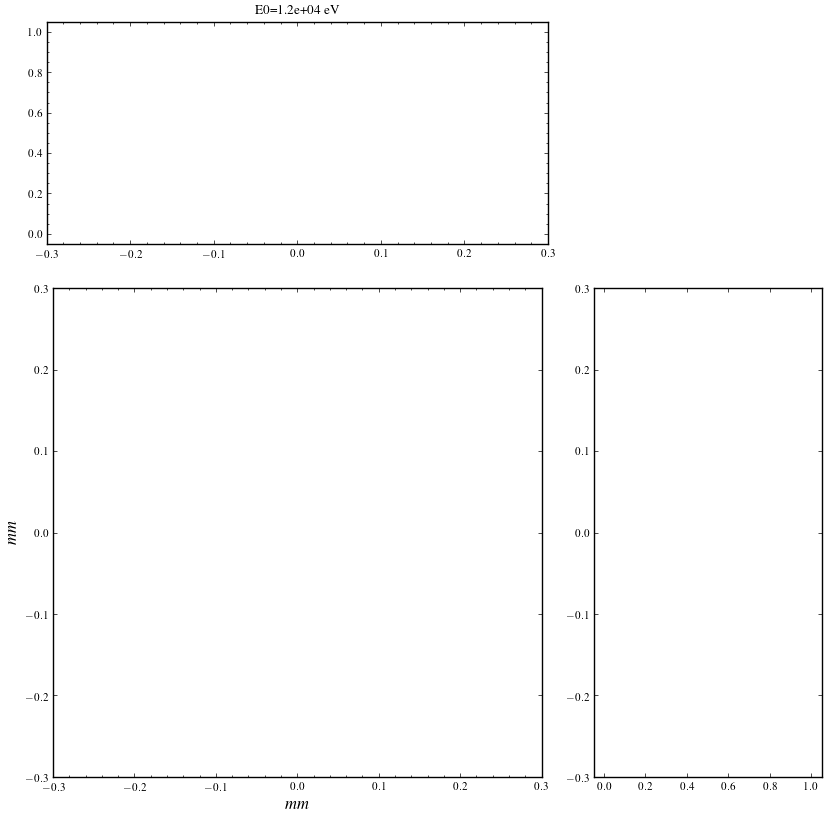

In [9]:
from felpy.model.beamline import Beamline
from wpg.optical_elements import Drift
from felpy.model.tools import propagation_parameters

bl = Beamline()
bl.append(Drift(1), propagation_parameters(1,1,1,1, mode = 'fresnel'))
bl.propagate(wfr)

plot_intensity_map(wfr)
#bl.propagate_sequential(wfr)

## Simple Analysis using [FELpy.wavefront](https://github.com/twguest/FELpy/blob/master/felpy/model/core/wavefront.py)

In [1]:
from felpy.utils.vis_utils import Grids

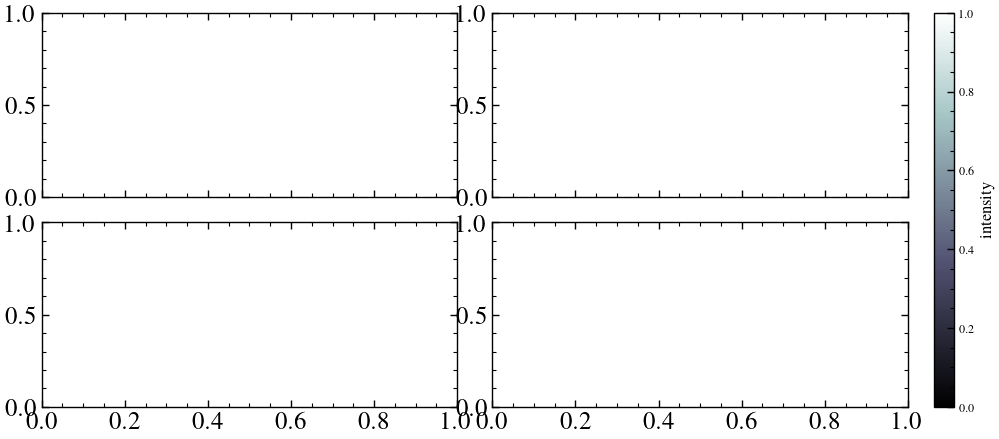

In [7]:
grid = Grids(scale = 2, global_aspect = 2.5)
grid.create_grid(n = 2, m = 2, sharex = True, sharey = False)
grid.set_fontsize(18)
grid.add_global_colorbar("intensity")